<a href="https://colab.research.google.com/github/Savvythelegend/MLE/blob/main/from_scratch/phishing-detection-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('/content/drive/MyDrive/Phishing Data - Phishing Data.csv')
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


## **Data Preprocessing & EDA**

In [28]:
df.shape

(2456, 31)

In [29]:
for col in df.columns:
  print(col)

having_IP_Address
URL_Length
Shortining_Service
having_At_Symbol
double_slash_redirecting
Prefix_Suffix
having_Sub_Domain
SSLfinal_State
Domain_registeration_length
Favicon
port
HTTPS_token
Request_URL
URL_of_Anchor
Links_in_tags
SFH
Submitting_to_email
Abnormal_URL
Redirect
on_mouseover
RightClick
popUpWidnow
Iframe
age_of_domain
DNSRecord
web_traffic
Page_Rank
Google_Index
Links_pointing_to_page
Statistical_report
Result


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

In [31]:
#checking the data for null or missing values
df.isnull().sum()

,0
having_IP_Address,0
URL_Length,0
Shortining_Service,0
having_At_Symbol,0
double_slash_redirecting,0
Prefix_Suffix,0
having_Sub_Domain,0
SSLfinal_State,0
Domain_registeration_length,0
Favicon,0


In [32]:
print(df['Result'].head(20))

0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    0
14    0
15    0
16    0
17    1
18    1
19    1
Name: Result, dtype: int64


In [33]:
print(df['Result'].tail(20))

2436    0
2437    1
2438    0
2439    1
2440    1
2441    1
2442    1
2443    1
2444    0
2445    0
2446    0
2447    1
2448    0
2449    1
2450    1
2451    1
2452    1
2453    0
2454    1
2455    0
Name: Result, dtype: int64


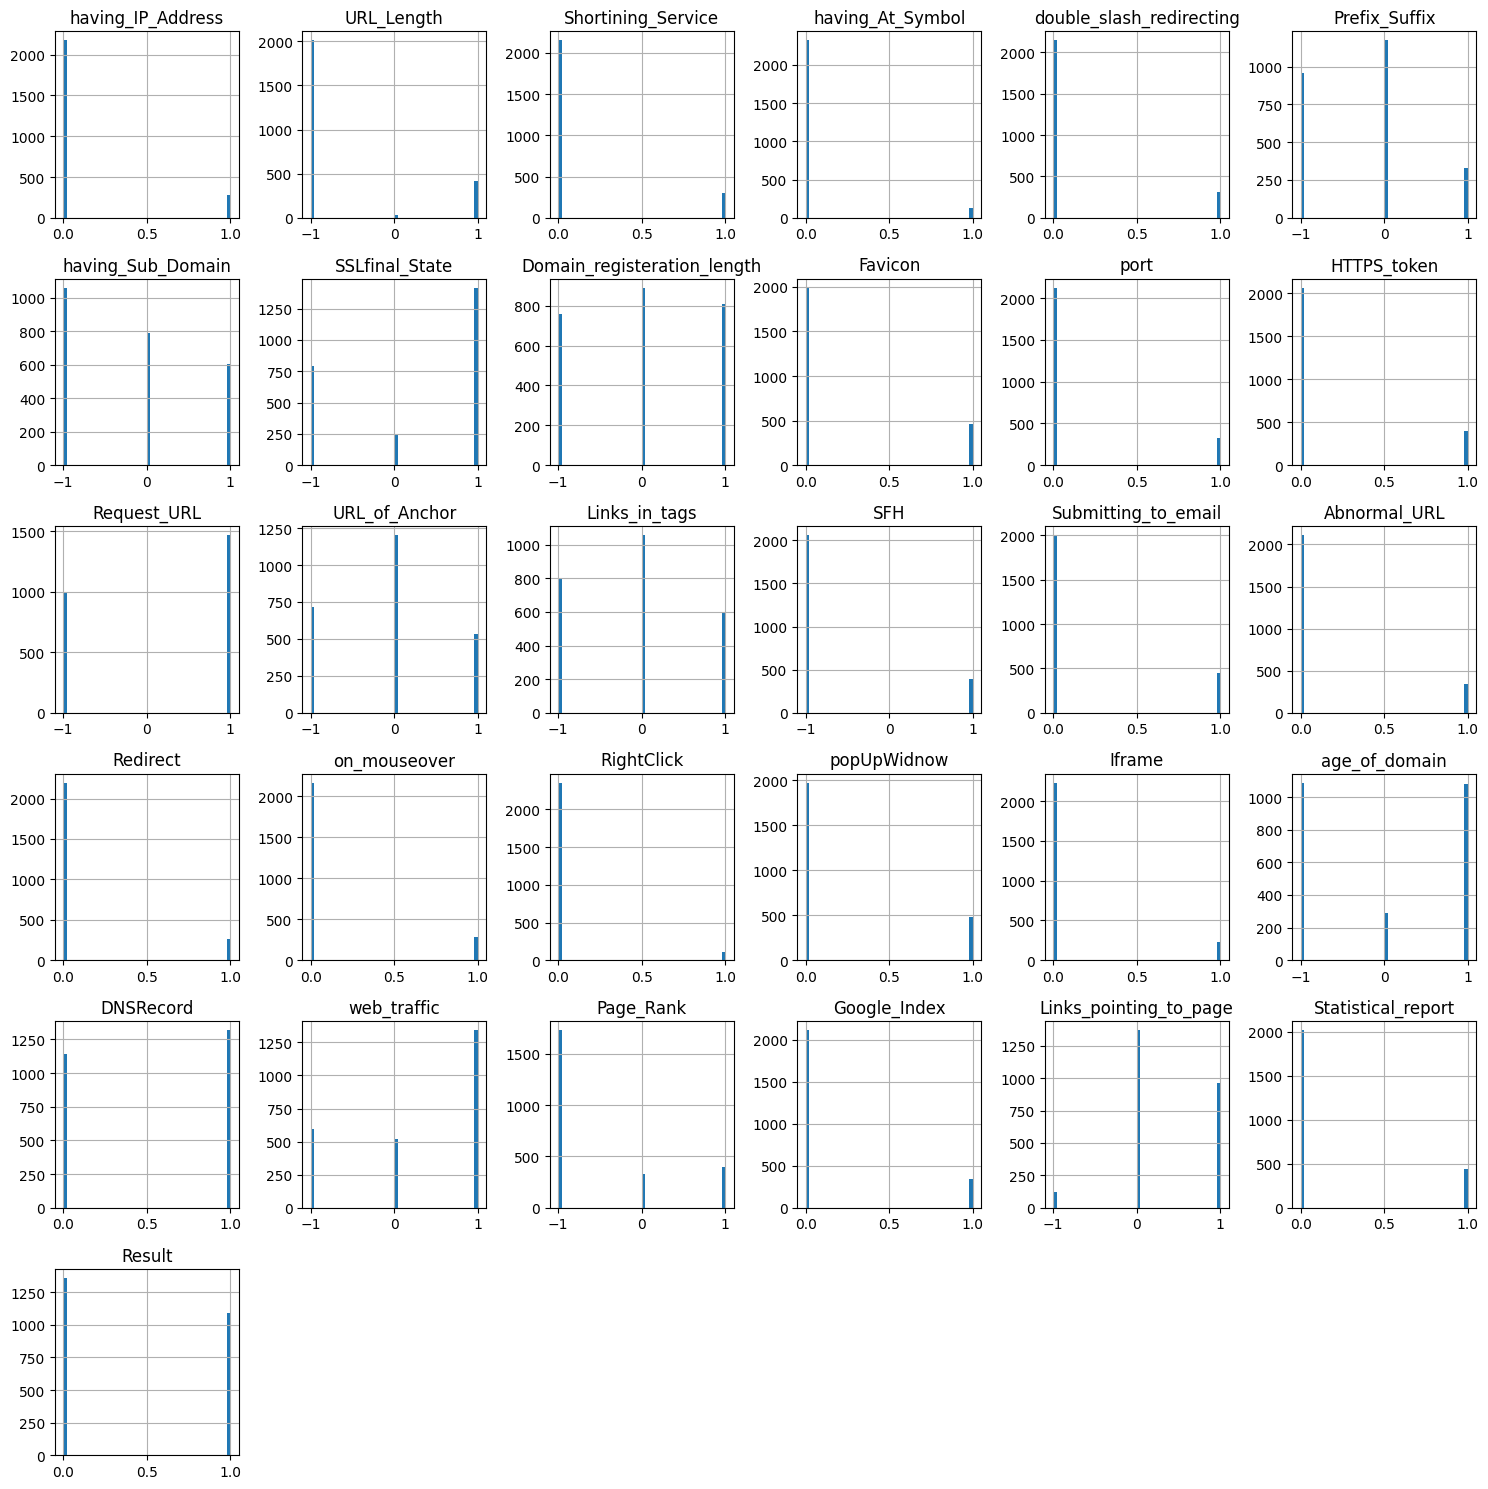

In [34]:
df.hist(bins=50, figsize=(15, 15))
plt.tight_layout()
plt.show()

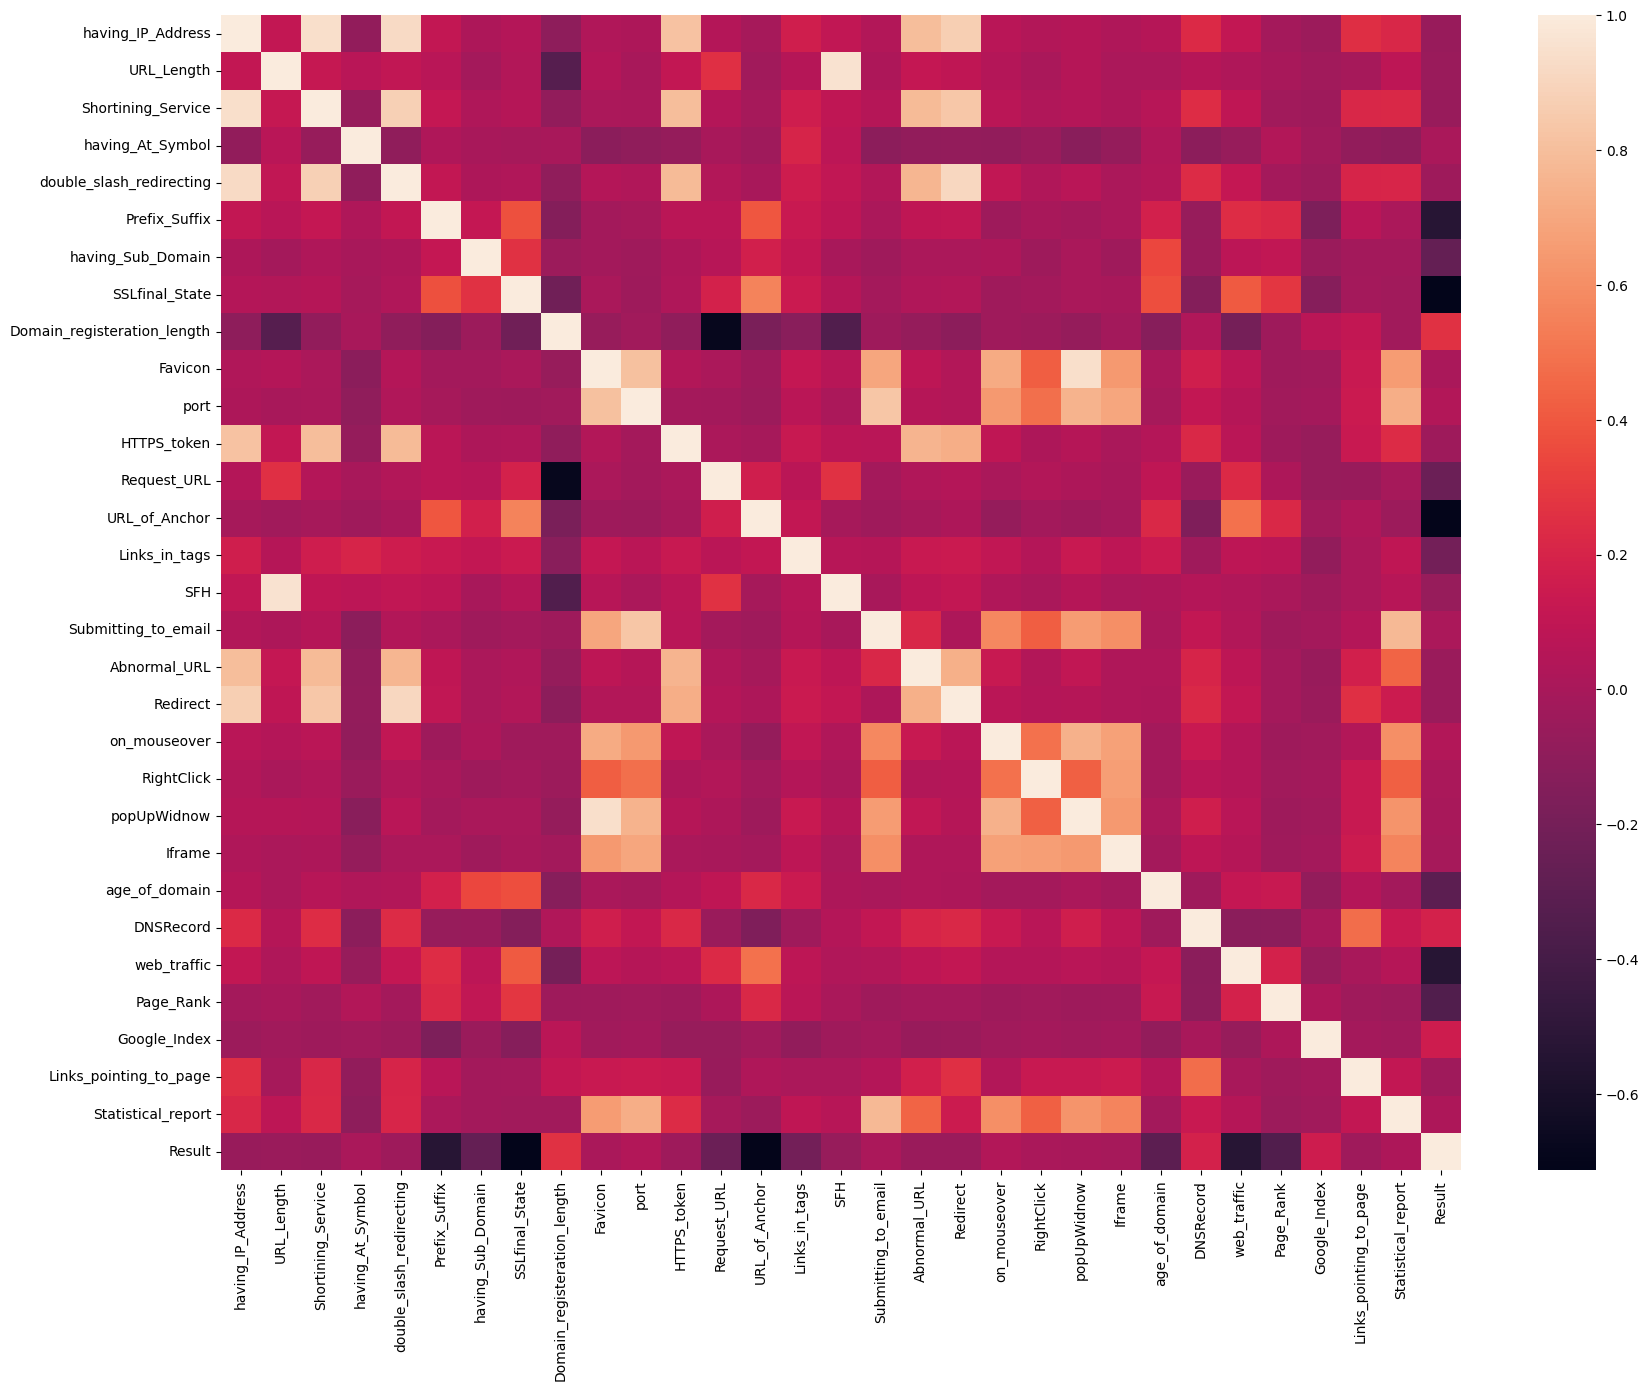

In [35]:
#Correlation heatmap

plt.figure(figsize=(20,15))
sns.heatmap(df.corr())
plt.show()

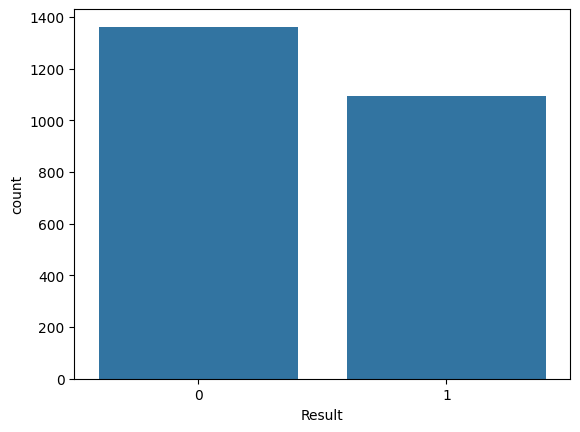

In [36]:
df['Result'].value_counts()
sns.countplot(x='Result', data=df)
plt.show()

## **Splitting the Data**

In [37]:
X = df.drop('Result', axis=1)
y = df['Result']
X.shape, y.shape

((2456, 30), (2456,))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)
X_train.shape, X_test.shape

((1964, 30), (492, 30))

In [39]:
## quick check
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"🔹 {name} 🔹")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 40)

🔹 Logistic Regression 🔹
Accuracy: 0.9288617886178862
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       273
           1       0.93      0.91      0.92       219

    accuracy                           0.93       492
   macro avg       0.93      0.93      0.93       492
weighted avg       0.93      0.93      0.93       492

----------------------------------------
🔹 Decision Tree 🔹
Accuracy: 0.9471544715447154
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       273
           1       0.95      0.93      0.94       219

    accuracy                           0.95       492
   macro avg       0.95      0.95      0.95       492
weighted avg       0.95      0.95      0.95       492

----------------------------------------
🔹 Random Forest 🔹
Accuracy: 0.9654471544715447
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       273
        

In [40]:
## ⚡ Takeaway
# Random Forest is the best performer here (96.5% accuracy + balanced precision/recall).
# Logistic Regression & SVM are solid baselines.
# Decision Tree is decent but not as robust as Random Forest.

## Machine Learning Models & Training

This is a supervised machine learning task, specifically a classification problem, as the goal is to classify a URL as either phishing (1) or legitimate (0). The following supervised machine learning models will be used to train the dataset:
*   Decision Tree
*   Random Forest
*   Support Vector Machines
*   XGBoost

In [41]:
#importing packages
from sklearn.metrics import accuracy_score

In [42]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth= 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [44]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [45]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.952
Decision Tree: Accuracy on test Data: 0.931


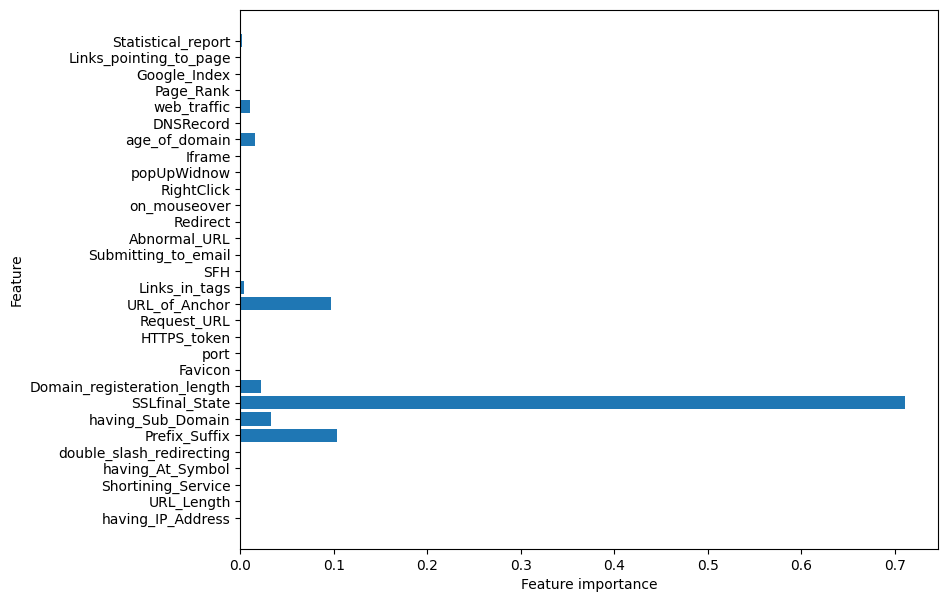

In [50]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [51]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [52]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [54]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [55]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.961
Random forest: Accuracy on test Data: 0.939


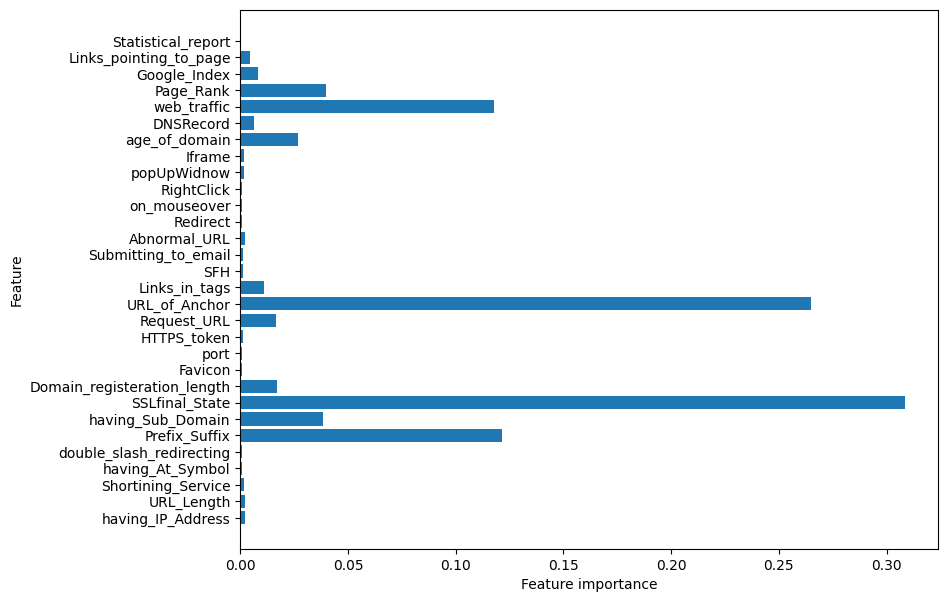

In [58]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [59]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [60]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [61]:

#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [62]:


#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.993
Multilayer Perceptrons: Accuracy on test Data: 0.959


In [80]:
storeResults('Multilayer Perceptrons',acc_train_mlp, acc_test_mlp)

In [63]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.4, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [64]:

#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [65]:

#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.994
XGBoost : Accuracy on test Data: 0.961


In [66]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [67]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [73]:

#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm1 = SVC(kernel='rbf', C=1.0, random_state=12) # c for penality
#fit the model
svm1.fit(X_train, y_train)


SVC(random_state=12)

In [74]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [75]:

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.950
SVM : Accuracy on test Data: 0.935


In [76]:
#predicting the target value from the model for the samples
y_test_svm = svm1.predict(X_test)
y_train_svm = svm1.predict(X_train)

In [77]:

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.970
SVM : Accuracy on test Data: 0.937


In [78]:
#storing the results. (rbf)
# The fact that the RBF kernel outperformed the linear kernel on your dataset suggests that the relationship between the features of phishing websites and legitimate ones is non-linear. There is no single straight line that can perfectly separate the two classes, and the RBF kernel was able to learn the curved boundaries that better fit your data.
storeResults('SVM', acc_train_svm, acc_test_svm)

## Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [81]:
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.952,0.931
1,Random Forest,0.961,0.939
2,XGBoost,0.994,0.961
3,SVM,0.970,0.937
4,Multilayer Perceptrons,0.993,0.959


For the above comparision, it is clear that the **XGBoost Classifier** works well with this dataset.

###Step 1: Feature Importance
Before tuning, it's helpful to understand what features the model considers most important, XGBoost has a built-in method to calculate feature importance, which can provide valuable insights.

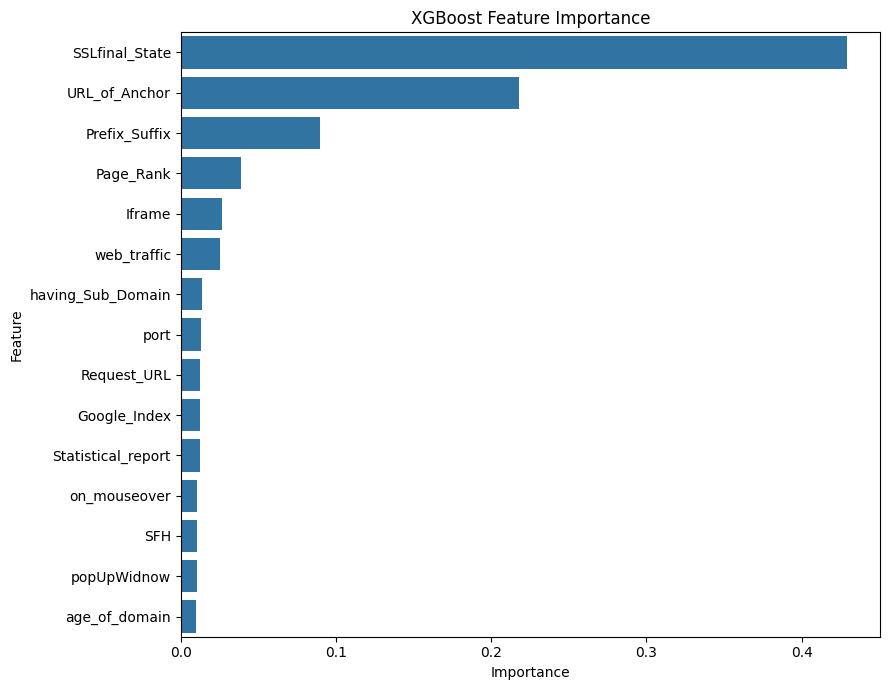

In [85]:
importances = xgb.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 most important features
plt.figure(figsize=(9,7))
plt.title("XGBoost Feature Importance")
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [86]:

print("\nTop 5 Most Important Features:")
print(feature_importance_df.head(5))


Top 5 Most Important Features:
           feature  importance
7   SSLfinal_State    0.428987
13   URL_of_Anchor    0.218035
5    Prefix_Suffix    0.089917
26       Page_Rank    0.038773
22          Iframe    0.026317


In [99]:
import joblib
joblib.dump(xgb, 'xgb_phishing_ml.joblib')
print("Model saved successfully!")

Model saved successfully!


###Step 2: Hyperparameter Tuning with Randomized Search and Cross-Validation (experimental)

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9]
}

# Instantiate RandomizedSearchCV using the existing xgb model
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Evaluate the best model on the test data
best_xgb_model = random_search.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
test_accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)

print("\nAccuracy of the best XGBoost model on the test data: {:.3f}".format(test_accuracy_xgb_tuned))

Best Parameters: {'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.1}
Best Cross-Validation Accuracy: 0.9623240899413201

Accuracy of the best XGBoost model on the test data: 0.951
